In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
# 1. 폰트를 'Malgun Gothic'으로 설정
plt.rc('font', family='Malgun Gothic')

# 2. 마이너스 기호 깨짐 방지 설정
plt.rcParams['axes.unicode_minus'] = False

| Column Name | Variable Name             | Content                                      |
|-------------|----------------------------|----------------------------------------------|
| laufkont    | status                     | 신용 신청자의 은행 계좌  잔고상태 (서순형)         |
| laufzeit    | duration                   | 대출 기간 (월 단위, 양적 변수)               |
| moral       | credit_history             | 과거 및 현재의 신용 계약 이행 이력 (서순형)  |
| verw        | purpose                    | 대출 목적 (명목형)                           |
| hoehe       | amount                     | 대출 금액 (양적 변수; 단조 변환 결과)        |
| sparkont    | savings                    | 신용 신청자의 저축 상태 (서순형)             |
| beszeit     | employment_duration        | 현재 고용주와의 고용 기간 (서열형)           |
| rate        | installment_rate           | 가처분 소득 대비 할부 비율 (서열형)          |
| famges      | personal_status_sex        | 결혼 상태와 성별의 결합 정보 (범주형)        |
| buerge      | other_debtors              | 추가 채무자 또는 보증인이 있는지 여부 (범주형)|
| wohnzeit    | present_residence          | 현재 거주지에 거주한 기간 (서열형)           |
| verm        | property                   | 가장 가치 있는 자산 (서열형)                 |
| alter       | age                        | 나이 (양적 변수)                             |
| weitkred    | other_installment_plans    | 다른 기관의 할부 계획 존재 여부 (범주형)     |
| wohn        | housing                    | 주거 형태 (서순형)                           |
| bishkred    | number_credits             | 해당 은행에서 현재 및 과거에 보유한 대출 수 (서열형) |
| beruf       | job                        | 직업 수준 (서열형)                           |
| pers        | people_liable              | 신용 신청자의 부양 가족 수 (이진형)          |
| telef       | telephone                  | 신용 신청자 명의로 등록된 전화선 여부 (이진형)|
| gastarb     | foreign_worker             | 외국인 노동자인지 여부 (이진형)              |
| kredit      | credit_risk                | 신용 위험 (양호 또는 불량)       1:good, 0: bad            |


In [239]:
df = pd.read_csv('dataset\\SouthGermanCredit.csv')
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


In [240]:
# 컬럼 이름 맵핑
df.columns = '''status
duration
credit_history
purpose
amount
savings
employment_duration
installment_rate
personal_status_sex
other_debtors
present_residence
property
age
other_installment_plans
housing
number_credits
job
people_liable
telephone
foreign_worker
credit_risk'''.split('\n')
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


In [241]:
#결측치 확인
df.isnull().sum().sum()

0

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [243]:
# 기존 1 : 3~ more  , 2: 0 ~ 1 값으로 된 것을 반대로 맵핑하여 서순형에 맞춤
df['people_liable'] = df['people_liable'].map({1: 2, 2: 1})

In [244]:
df['credit_risk'].value_counts()

credit_risk
1    700
0    300
Name: count, dtype: int64

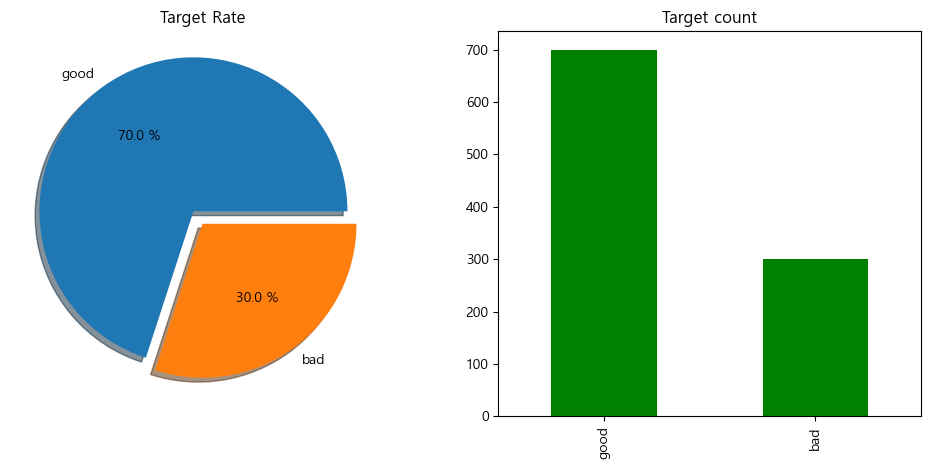

In [245]:
f,a = plt.subplots(1,2,figsize= (12,5))
a[0].pie(df['credit_risk'].value_counts(),labels = ['good', 'bad'],shadow = True,explode = [0.1,0] ,autopct='%.1f %%');
a[0].set_title('Target Rate')
credit_risk_counts = df['credit_risk'].value_counts()
credit_risk_counts.index = ['good', 'bad']  # Setting custom labels for the index
credit_risk_counts.plot.bar(ax=a[1],color = 'g')
a[1].set_title('Target count');

# 불균형 존재

# 연속형 및 서순형
+ status
+ credit_history
+ duration
+ amount
+ employment_duration
+ installment_rate
+ present_residence
+ property
+ age
+ number_credits
+ job
+ people_liable -> 값이 두개지만 순서 있다
+ savings
+ housing

# 이진형

+ telephone
+ foreign_worker
+ credit_risk -> TARGET

# 범주형
+ purpose
+ personal_status_sex
+ other_debtors
+ other_installment_plans

# purpose


+ 0: 기타 (others)
+ 1: 자동차 (신차 구매) (car (new))
+ 2: 자동차 (중고차 구매) (car (used))
+ 3: 가구 또는 장비 (furniture/equipment)
+ 4: 라디오 또는 텔레비전 (radio/television)
+ 5: 가전제품 (domestic appliances)
+ 6: 수리 (repairs)
+ 7: 교육 (education)
+ 8: 휴가 (vacation)
+ 9: 재교육 (retraining)
+ 10: 사업 (business)


In [246]:
df['purpose'].value_counts()

purpose
3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: count, dtype: int64

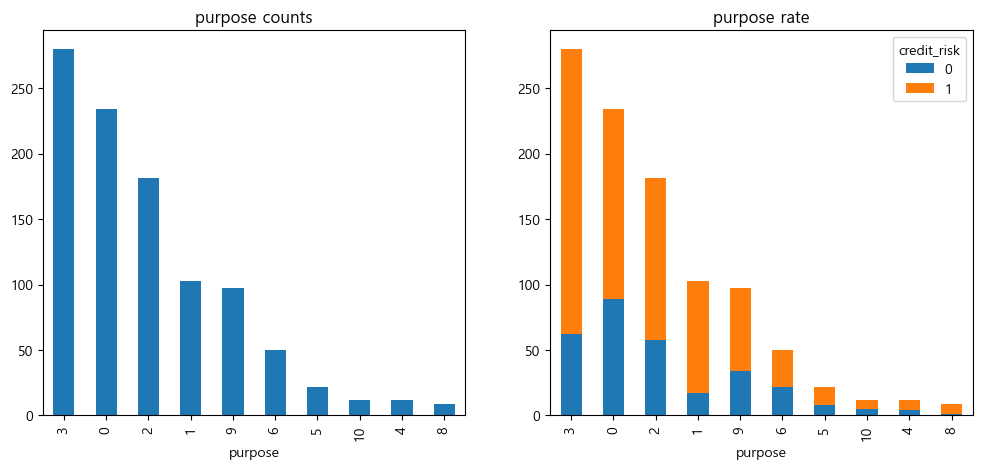

In [247]:
f,a = plt.subplots(1,2,figsize = (12,5))
df['purpose'].value_counts().plot.bar(ax = a[0])
a[0].set_title('purpose counts')
purpose_order = df['purpose'].value_counts().index  # 빈도 기준으로 정렬된 순서
# 그룹화된 데이터를 빈도순으로 정렬하여 시각화
df.groupby(by=['purpose', 'credit_risk']).size().unstack().loc[purpose_order].plot.bar(stacked=True,ax =a[1])
a[1].set_title('purpose rate');

# personal_status_sex

+ 1: 남성, 이혼 또는 별거 중 (male : divorced/separated)
+ 2: 여성, 비독신 (결혼 또는 이혼/별거/사별) 또는 남성, 독신 (female : non-single or male : single)
+ 3: 남성, 기혼 또는 사별 (male : married/widowed)
+ 4: 여성, 독신 (female : single)

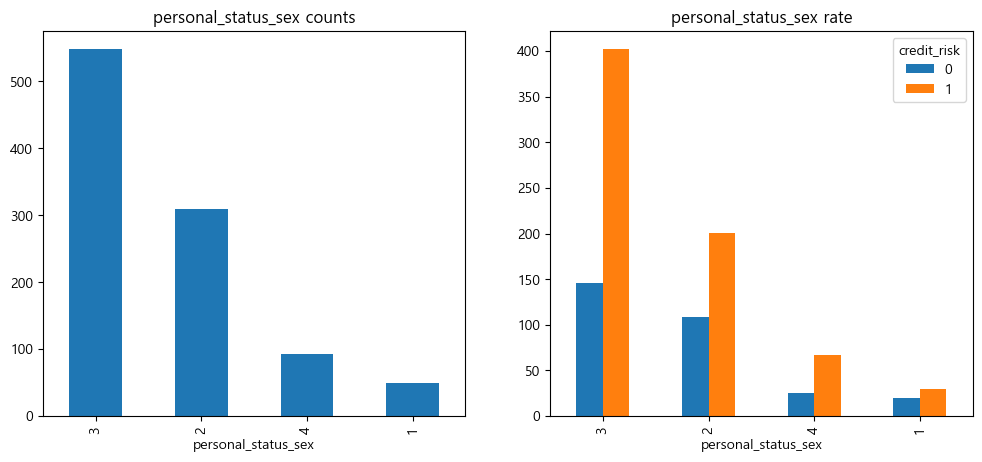

In [248]:
f,a = plt.subplots(1,2,figsize = (12,5))
df['personal_status_sex'].value_counts().plot.bar(ax = a[0])
a[0].set_title('personal_status_sex counts')
personal_status_sex_order = df['personal_status_sex'].value_counts().index  # 빈도 기준으로 정렬된 순서
# 그룹화된 데이터를 빈도순으로 정렬하여 시각화
df.groupby(by=['personal_status_sex', 'credit_risk']).size().unstack().loc[personal_status_sex_order].plot.bar(ax =a[1])
a[1].set_title('personal_status_sex rate');

# other_debtors

+ 1: 없음 (none) - 다른 채무자나 보증인이 없음
+ 2: 공동 신청자 (co-applicant) - 대출에 대한 공동 신청자가 있음
+ 3: 보증인 (guarantor) - 대출에 대한 보증인이 있음

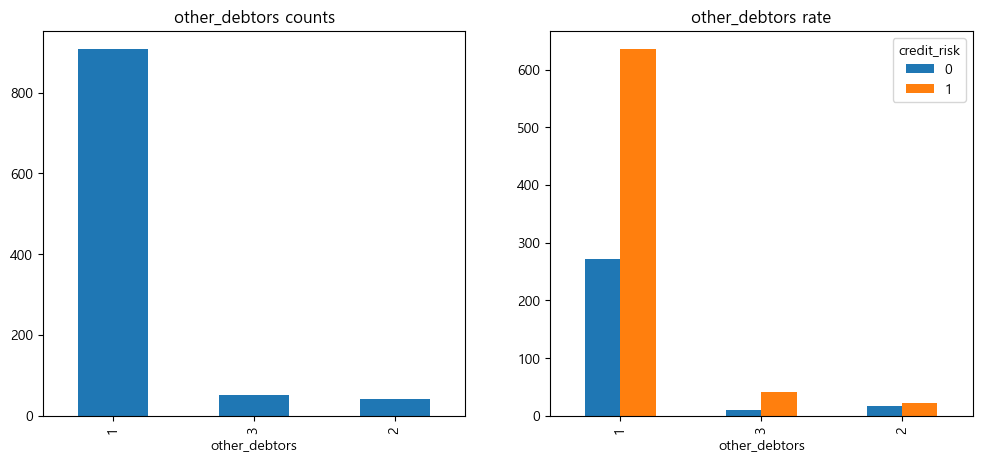

In [249]:
f,a = plt.subplots(1,2,figsize = (12,5))
df['other_debtors'].value_counts().plot.bar(ax = a[0])
a[0].set_title('other_debtors counts')
other_debtors_order = df['other_debtors'].value_counts().index  # 빈도 기준으로 정렬된 순서
# 그룹화된 데이터를 빈도순으로 정렬하여 시각화
df.groupby(by=['other_debtors', 'credit_risk']).size().unstack().loc[other_debtors_order].plot.bar(ax =a[1])
a[1].set_title('other_debtors rate');

# other_installment_plans

+ 1: 은행 (bank) - 다른 은행에서 할부 계획을 가지고 있음
+ 2: 상점 (stores) - 상점에서 할부 계획을 가지고 있음
+ 3: 없음 (none) - 다른 할부 계획이 없음

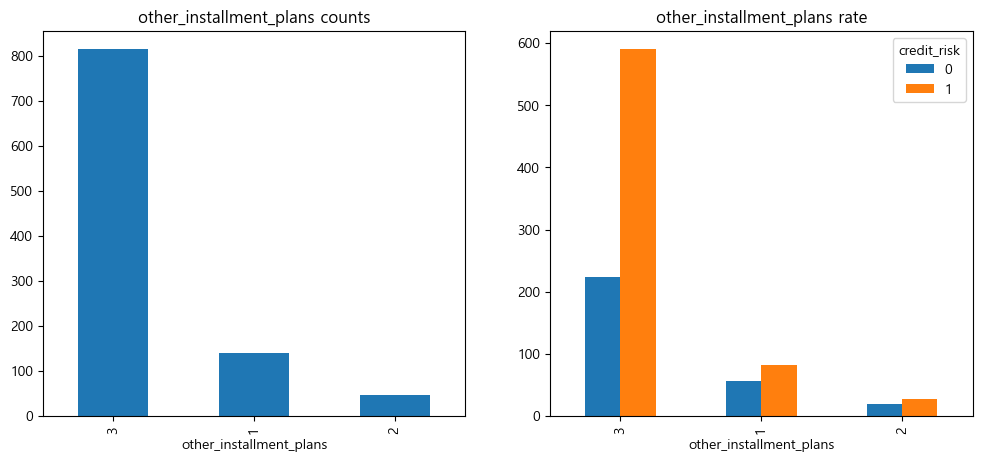

In [250]:
f,a = plt.subplots(1,2,figsize = (12,5))
df['other_installment_plans'].value_counts().plot.bar(ax = a[0])
a[0].set_title('other_installment_plans counts')
other_installment_plans_order = df['other_installment_plans'].value_counts().index  # 빈도 기준으로 정렬된 순서
# 그룹화된 데이터를 빈도순으로 정렬하여 시각화
df.groupby(by=['other_installment_plans', 'credit_risk']).size().unstack().loc[other_installment_plans_order].plot.bar(ax =a[1])
a[1].set_title('other_installment_plans rate');

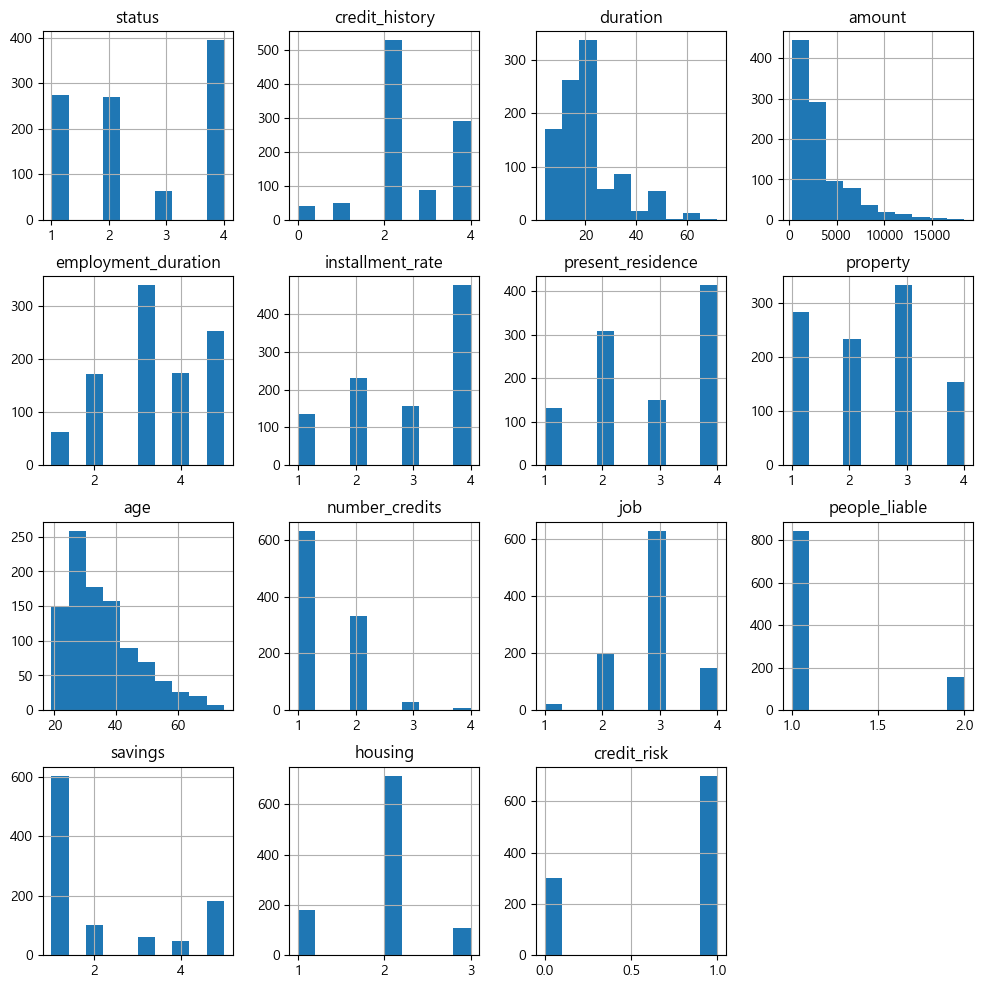

In [251]:
df_order = df[['status','credit_history','duration','amount','employment_duration','installment_rate','present_residence','property','age','number_credits','job','people_liable','savings','housing','credit_risk']]
df_order.hist( figsize=(12,12));

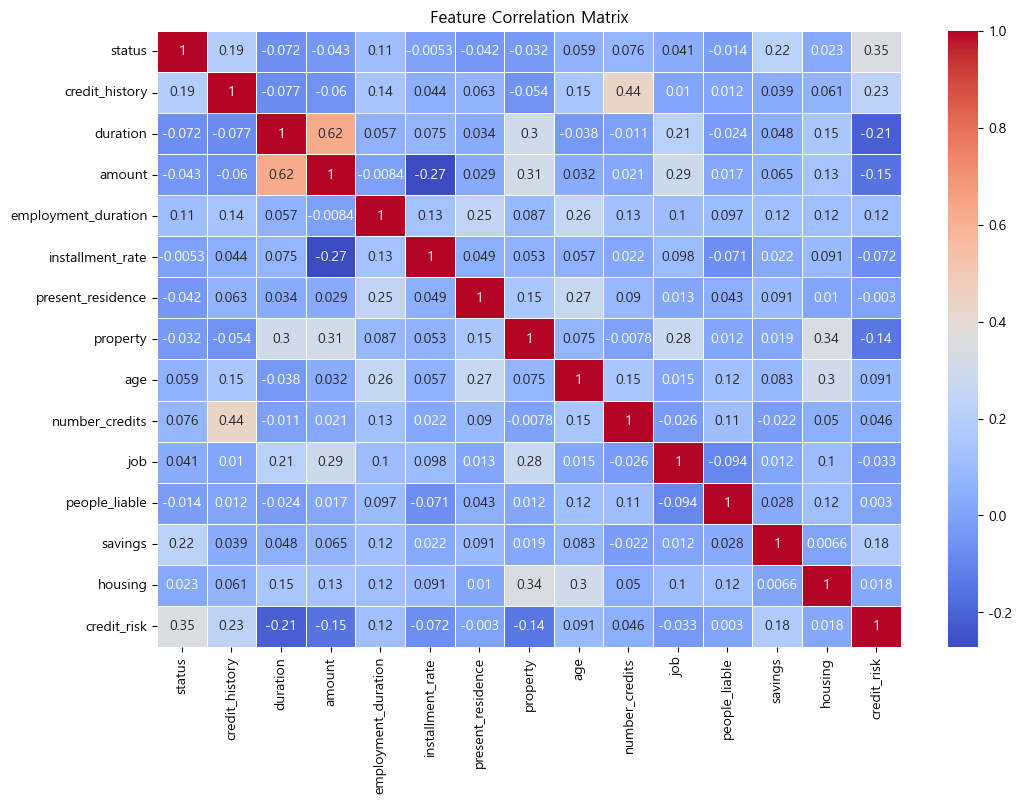

In [252]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_order.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# 연속 변수

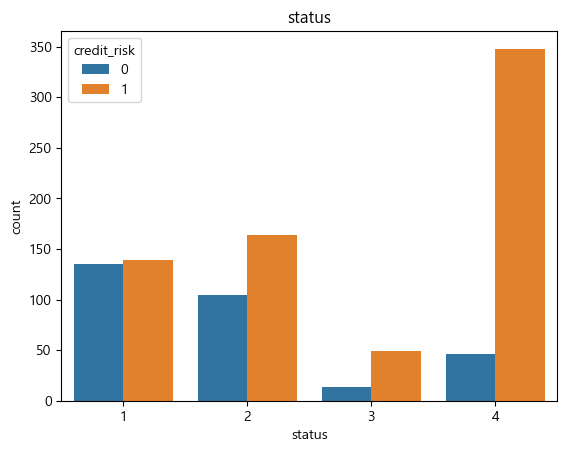

In [253]:
sns.countplot(data =df, x = 'status',hue = 'credit_risk')
plt.title('status');
# 잔고가 많을 수 록 잘 갚는다

In [254]:
def scatter(x_name,y_name):
    plt.scatter(df[x_name],df[y_name])
    plt.title(f'{x_name} vs {y_name}')
    plt.show()

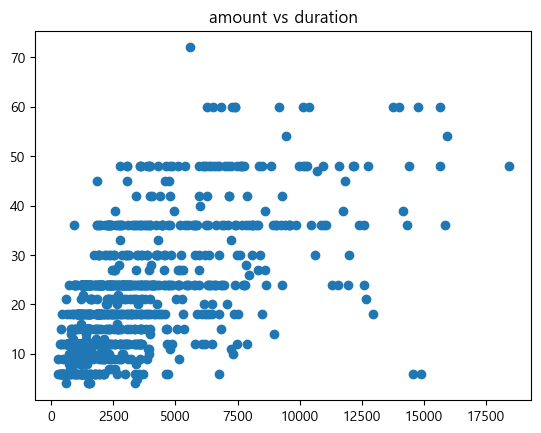

In [255]:
scatter('amount','duration')
#빌린돈이 많으면 갚는데 오래 걸린다.

# property

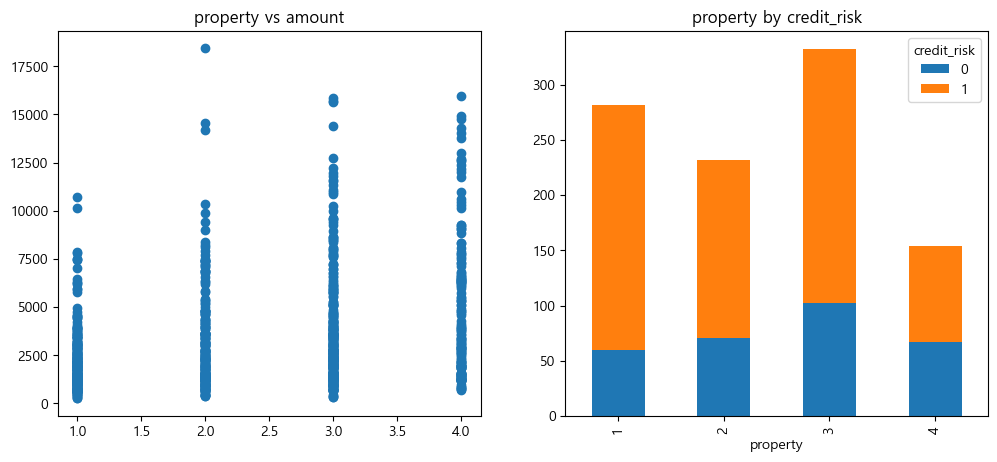

In [256]:
f,a = plt.subplots(1,2,figsize = (12,5))
a[0].scatter(df['property'],df['amount'])
a[0].set_title('property vs amount')
pd.crosstab(df['property'],df['credit_risk']).plot.bar(stacked = True , ax = a[1])
a[1].set_title('property by credit_risk');
# 자산이 많으면 빌리는 돈도 많다.
# 자산이 많으면 못 갚는 비율이 증가함

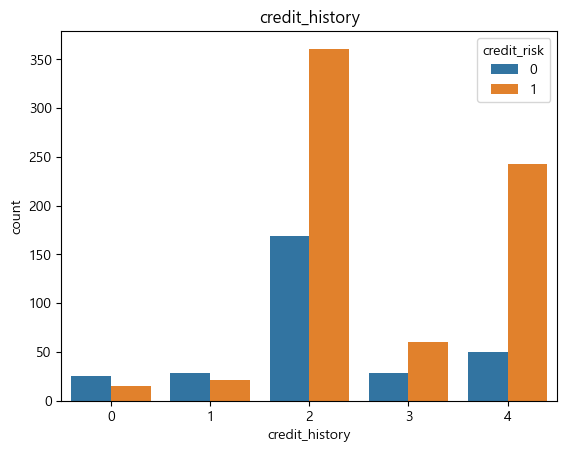

In [257]:
sns.countplot(data =df, x = 'credit_history',hue = 'credit_risk')
plt.title('credit_history');

# age

<Axes: xlabel='credit_risk', ylabel='age'>

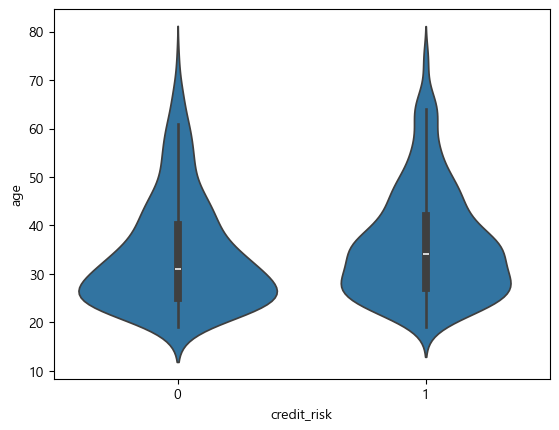

In [258]:
sns.violinplot(df,x='credit_risk', y = 'age')

Text(0.5, 1.0, 'amount vs credit_risk')

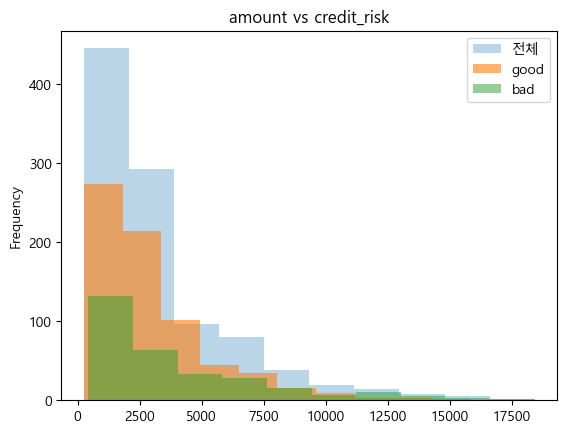

In [259]:
# 빌린 양이 많으면 못 값을 확률이 조금 증가
df['amount'].plot.hist(alpha = 0.3,label = '전체')
df[df['credit_risk'] == 1]['amount'].plot.hist(alpha = 0.6,label = 'good')
df[df['credit_risk'] == 0]['amount'].plot.hist(alpha = 0.5,label = 'bad')
plt.legend();
plt.title('amount vs credit_risk')

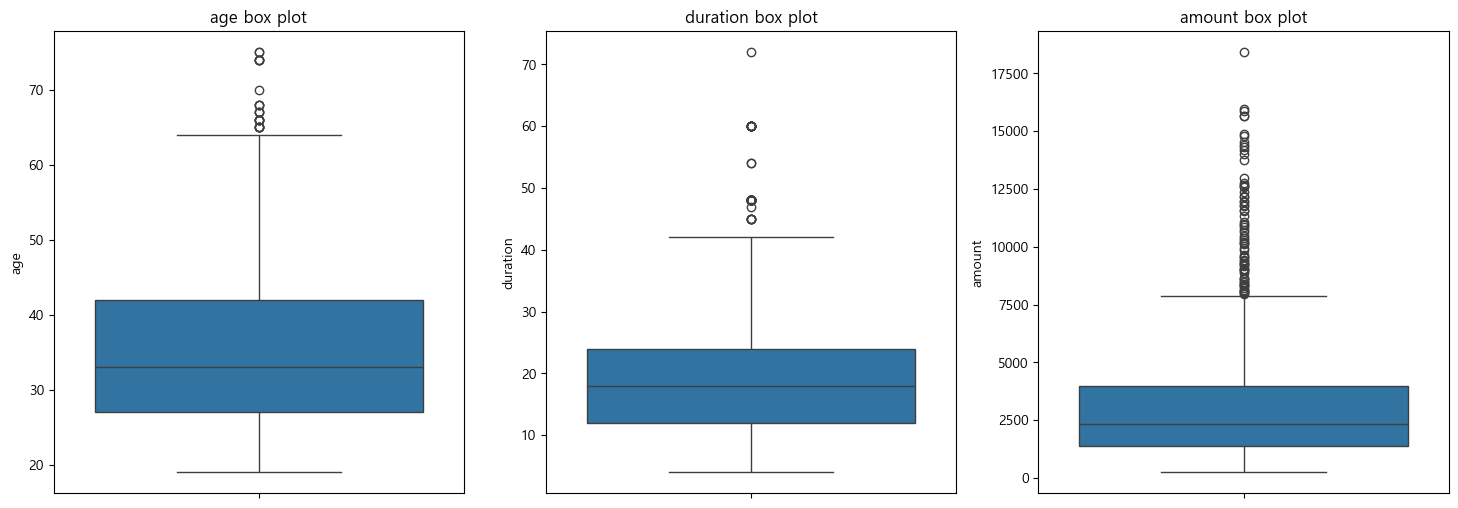

In [260]:
f,a = plt.subplots(1,3,figsize = (18,6))
df_continuous = df[['age','duration','amount']]
sns.boxplot(df_continuous['age'], ax = a[0])
sns.boxplot(df_continuous['duration'],ax = a[1])
sns.boxplot(df_continuous['amount'],ax = a[2])

for i,x in enumerate(df_continuous.columns):
    a[i].set_title(f'{x} box plot')
# 이상치 존재 --> 로버스트 스케일링

# 데이터 전처리 
+ 범주형 변수 명목변수 인코딩
+ 이진형 변수가 1,2로 인코딩 된 것 0,1로 다시 맵핑

# purpose 줄이기
+ 일상적인 소비: 가전제품, 라디오/텔레비전, 휴가
  + 5: 가전제품 (domestic appliances)
  + 4: 라디오 또는 텔레비전 (radio/television)
  + 8: 휴가 (vacation)

+ 자산 구매: 자동차 (신차/중고차), 가구/장비
  + 1: 자동차 (신차 구매) (car (new))
  + 2: 자동차 (중고차 구매) (car (used))
  + 3: 가구 또는 장비 (furniture/equipment)

+ 자기 개발 및 학습: 교육, 재교육
   + 7: 교육 (education)
   + 9: 재교육 (retraining)

+ 비상 상황 및 수리: 수리, 기타
  + 6: 수리 (repairs)
  + 0: 기타 (others)
+ 사업 목적: 사업
  + 10: 사업 (business_)

In [261]:
# purpose 줄이기
d =  {5: "Daily" , 4 :'Daily' , 8 : 'Daily' , 1: 'Asset', 2: 'Asset', 3: "Asset", 7: 'Edu', 9: "Edu" , 6: "Emergency", 0 : "Emergency", 10: "Business"}
df['purpose'] = df['purpose'].map(d)
df['purpose']

0          Asset
1      Emergency
2            Edu
3      Emergency
4      Emergency
         ...    
995        Asset
996    Emergency
997    Emergency
998        Asset
999        Asset
Name: purpose, Length: 1000, dtype: object

In [262]:
# 이진형 변수 0,1 로 처리 이게 예 아니요로 정확함
# telephone
# foreign_worker
d_binary = {1 : 0, 2: 1}
df['telephone'] = df['telephone'].map(d_binary)
df['foreign_worker'] = df['foreign_worker'].map(d_binary)
print(df.shape)
df

(1000, 21)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,Asset,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,0,1,1
1,1,9,4,Emergency,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,0,1,1
2,2,12,2,Edu,841,2,4,2,2,1,4,1,23,3,1,1,2,1,0,1,1
3,1,12,4,Emergency,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,0,0,1
4,1,12,4,Emergency,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,Asset,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,0,1,0
996,1,24,2,Emergency,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,0,1,0
997,4,21,4,Emergency,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,1,1,0
998,2,12,2,Asset,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,1,1,0


In [263]:
# 범주형 변수
#purpose
#personal_status_sex
#other_debtors
#other_installment_plans

In [264]:
df = pd.concat([
    df, 
    pd.get_dummies(df['purpose'], prefix='purpose', dtype=int),
    pd.get_dummies(df['personal_status_sex'], prefix='personal_status_sex', dtype=int),
    pd.get_dummies(df['other_debtors'], prefix='other_debtors', dtype=int),
    pd.get_dummies(df['other_installment_plans'], prefix='other_installment_plans', dtype=int)
], axis=1)
df.drop(['purpose','personal_status_sex',"other_debtors",'other_installment_plans'],axis = 1, inplace = True)
df.shape

(1000, 32)

# 모델 학습

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import robust_scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
x = df.drop(['credit_risk'],axis= 1)
#x = robust_scale(x)
# StandardScaler 객체 생성
#scaler = StandardScaler()
# 데이터를 스케일링
#x = scaler.fit_transform(x)
y = df['credit_risk']
train_input, test_input, train_target, test_target  = train_test_split(x,y)
lr = LogisticRegression().fit(train_input,train_target)
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.7813333333333333
0.796


c:\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [145]:
0.7653333333333333
0.748
#기본

0.748

In [146]:
0.7746666666666666
0.76
# 로버스트 스케일링

0.76

In [ ]:
0.772
0.76
# minmax 스케일링

In [163]:
0.776
0.76
# standard 스케일링

0.76